# Go to In[15] and In[16] to see the plots that I put in my Thesis

In [1]:
import time
from math import sin, cos, sqrt, atan2, radians, pow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

DATA_new=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\space_time_total_catalogue.csv")
DATA_new

,Spacetime_distance,Mainshock,Aftershock,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,2.885439e+07,1907.0,0.0,24328471,2020-04-28T13:00:30.050000,38.4607,13.64330,17.7,SURVEY-INGV,NaN,NaN,NaN,ML,3.5,--,Tirreno Meridionale (MARE)
1,3.537832e+06,2.0,1.0,24326871,2020-04-28T07:14:45.750000,38.5943,14.17220,27.5,SURVEY-INGV,NaN,NaN,NaN,ML,3.0,--,Tirreno Meridionale (MARE)
2,8.460595e+06,9.0,2.0,24326451,2020-04-28T05:57:28.820000,38.4052,13.60600,25.4,SURVEY-INGV,NaN,NaN,NaN,ML,3.1,--,Costa Siciliana centro-settentrionale (Palermo)
3,3.531638e+07,6208.0,3.0,24317311,2020-04-26T02:59:02.450000,40.8285,14.15167,2.5,SURVEY-INGV-OV,NaN,NaN,NaN,Md,3.1,--,5 km E Pozzuoli (NA)
4,2.325441e+06,36.0,4.0,24313381,2020-04-25T07:21:54.480000,37.7523,14.61750,23.5,BULLETIN-INGV,NaN,NaN,NaN,ML,3.4,--,4 km SE Troina (EN)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,1.353561e+07,11187.0,11186.0,809,1985-01-09T03:13:01.090000,43.3020,12.63800,4.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,8 km SE Gubbio (PG)
11187,3.940260e+03,11189.0,11187.0,769,1985-01-08T23:33:34.130000,43.3030,12.55000,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.6,--,6 km SW Gubbio (PG)
11188,7.166286e+04,11191.0,11188.0,599,1985-01-07T11:07:55.060000,44.2220,6.77800,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.0,--,Confine Italia-Francia (FRANCIA)
11189,5.534019e+05,11191.0,11189.0,529,1985-01-07T00:34:49.290000,43.2250,12.73000,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,5 km W Gualdo Tadino (PG)


In [5]:
list_TR=[]
b=1.2
DATA_new['Time']=DATA_new['Time'].astype(np.datetime64)
for e in DATA_new.index:
    aft=int(DATA_new['Aftershock'].iloc[e])
    main=int(DATA_new['Mainshock'].iloc[e])
    if main <11191:
        dtime=((DATA_new['Time'].iloc[e]-DATA_new['Time'].iloc[main])).total_seconds()
        mag=DATA_new['Magnitude'].iloc[main]
        r=((DATA_new['Spacetime_distance'].iloc[e])/(dtime*pow(10,(-b*(mag)))))
        r=r*r**0.25
        T=dtime*pow(10,-b*((mag)/2))
        R=(r*pow(10,(-b*(mag)/2)))
        list_TR.append([T,R,mag,e])

In [6]:
TR=pd.DataFrame(list_TR)
TR.rename({0:'T',1:'R',2:'Magnitude',3:'Index'},axis=1,inplace=True)

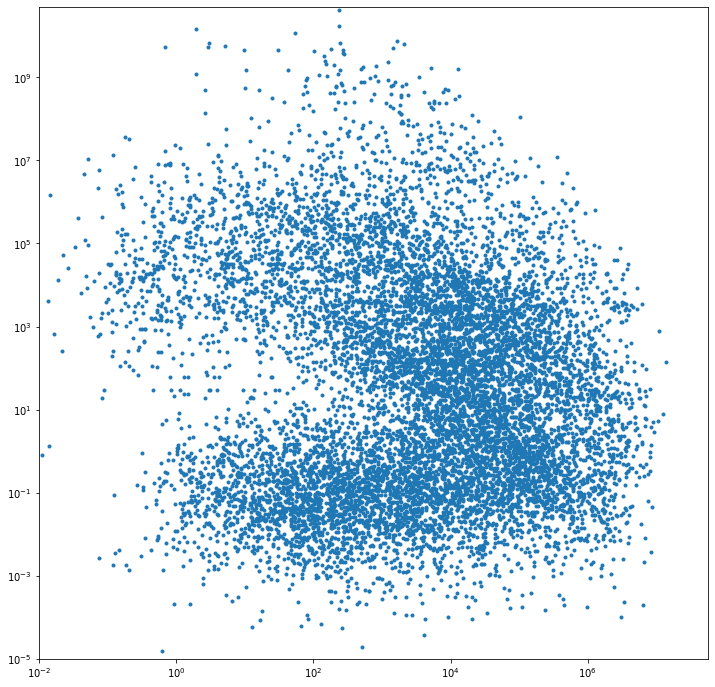

In [4]:
from scipy.stats import gaussian_kde
f, a = plt.subplots(figsize=(12,12))
xy = np.vstack([TR['T'],TR['R']])
z = gaussian_kde(xy)(xy)
bins = np.logspace(0,7,num=30) 
#sns.distplot(TR['T'],TR['R'], (60, 60), cmap=plt.cm.jet ,bins=bins)
#plt.colorbar()
#g=sns.scatterplot(TR['T'],TR['R'])#,c=z)
#g = sns.jointplot(TR['T'],TR['R'], kind="hex")
s = a.scatter(TR['T'],TR['R'],s=9) #,c=z, s=10, cmap='jet', edgecolor='', label=None, picker=True, zorder=2 ) 
#g = sns.heatmap([TR['T'],TR['R']], linewidth=0.4,bins=bins)
plt.xscale('log')
plt.yscale('log')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.ylim((0.00001, 50000000000))
plt.xlim((0.01, 57000000))
#g.ax_joint.set_xscale('log')
#g.ax_joint.set_yscale('log')
#g.ax_joint.set_ylim((0.00001, 50000000000))          #plt.ylim((0.00001, 50000000000))
#g.ax_joint.set_xlim((0.01, 57000000)) #    57000000)   




plt.show()

In [7]:
indici=[]
for tr in TR.index:
    if TR['T'].iloc[tr]*TR['R'].iloc[tr]>19200 and TR['T'].iloc[tr]>3400: #and TR['R'].iloc[tr]>0.001  :
        indici.append(TR['Index'].iloc[tr])
indici=pd.Series(indici)
indici.rename='index'
indici = indici.to_frame('index')

In [8]:
DECLUSTERED=pd.merge(DATA_new,indici,left_index=True,right_on='index')

In [9]:
df=DECLUSTERED
df.sort_values(by='Time',ascending=True,inplace=True)
num=pd.Series([i for i in reversed(range(0,int(df.size/len(df.columns))))])  #range(0,2,-1) gives [2,1], riversed gives [1,0]
df=pd.concat([df,num],axis=1)
df.set_index(0,inplace=True)
df=df[::-1]
df

,Spacetime_distance,Mainshock,Aftershock,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,index
0,,,,,,,,,,,,,,,,,
0,9.783141e+05,11190.0,11184.0,1099,1985-01-11 20:30:36.530,37.4040,14.44300,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,2 km SW Aidone (EN),11184
1,1.261267e+08,11187.0,11181.0,1669,1985-01-19 15:34:58.090,40.4540,16.12700,8.3,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,5 km SW Accettura (MT),11181
2,3.761664e+05,11185.0,11179.0,1859,1985-01-21 06:14:56.440,41.2960,14.52800,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.2,--,2 km NW San Lorenzello (BN),11179
3,3.014473e+08,11175.0,11173.0,2889,1985-02-04 00:34:36.800,42.8180,12.87200,2.8,BULLETIN-VAX,NaN,NaN,NaN,Md,3.1,--,4 km W Cerreto di Spoleto (PG),11173
4,6.489689e+07,11175.0,11172.0,3239,1985-02-06 21:03:17.090,39.6470,16.81900,7.2,BULLETIN-VAX,NaN,NaN,NaN,Md,3.4,--,Costa Ionica Cosentina (Cosenza),11172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,2.157285e+07,23.0,5.0,24312261,2020-04-25 00:40:02.630,37.7413,14.60980,26.0,SURVEY-INGV,NaN,NaN,NaN,ML,3.2,--,5 km S Troina (EN),5
4500,2.325441e+06,36.0,4.0,24313381,2020-04-25 07:21:54.480,37.7523,14.61750,23.5,BULLETIN-INGV,NaN,NaN,NaN,ML,3.4,--,4 km SE Troina (EN),4
4501,3.531638e+07,6208.0,3.0,24317311,2020-04-26 02:59:02.450,40.8285,14.15167,2.5,SURVEY-INGV-OV,NaN,NaN,NaN,Md,3.1,--,5 km E Pozzuoli (NA),3


### For the following script, I didn't use a formal statistical test, but I simply elected some random values in the distribution and then evaluating the chi-square test for this values. (I haven't written about that in my Thesis)

In [10]:

a=df[(df['Magnitude']>3.3)& (df['Time']>datetime.datetime(1985,1,1,1,1))& (df['Time']<datetime.datetime(2020,4,30,1,1,1))]

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(1000):
    random.shuffle(nt)
    #nt.sort()
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for u in range(2)]
    nt_choice.sort()
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency
    s=np.random.poisson(np.mean(nt),len(nt_choice))
    s.sort()
    #chi2_contingency(number_time_count,s)
    test,d=chisquare(nt_choice,s)
    chi.append(test)
mean(chi)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


17.89748094603185

(array([ 20.,  53.,  62.,  36.,  82., 119.,  42.,  75.,  91.,  82.,  20.,
         11.,   1.,   6.,   9.,   6.,  33.,  31.,  40.,  37.,  37.,  31.]),
 array([427.        , 434.77272727, 442.54545455, 450.31818182,
        458.09090909, 465.86363636, 473.63636364, 481.40909091,
        489.18181818, 496.95454545, 504.72727273, 512.5       ,
        520.27272727, 528.04545455, 535.81818182, 543.59090909,
        551.36363636, 559.13636364, 566.90909091, 574.68181818,
        582.45454545, 590.22727273, 598.        ]),
 <a list of 22 Patch objects>)

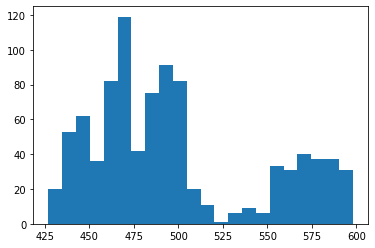

In [32]:
plt.hist(number_time_count,bins=22)

(array([  5.,  12.,  12.,  18.,  26.,  40.,  60.,  66.,  83., 103., 103.,
         88.,  69.,  54.,  72.,  41.,  33.,  15.,  12.,   5.,   4.,   3.]),
 array([438.        , 443.77272727, 449.54545455, 455.31818182,
        461.09090909, 466.86363636, 472.63636364, 478.40909091,
        484.18181818, 489.95454545, 495.72727273, 501.5       ,
        507.27272727, 513.04545455, 518.81818182, 524.59090909,
        530.36363636, 536.13636364, 541.90909091, 547.68181818,
        553.45454545, 559.22727273, 565.        ]),
 <a list of 22 Patch objects>)

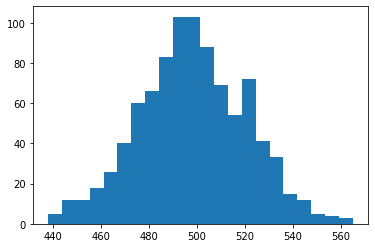

In [35]:
plt.hist(np.random.poisson(np.mean(nt),len(nt)),bins=22)

In [34]:
#a.to_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA_correlation_metrics_20000_3600.csv",index=False)

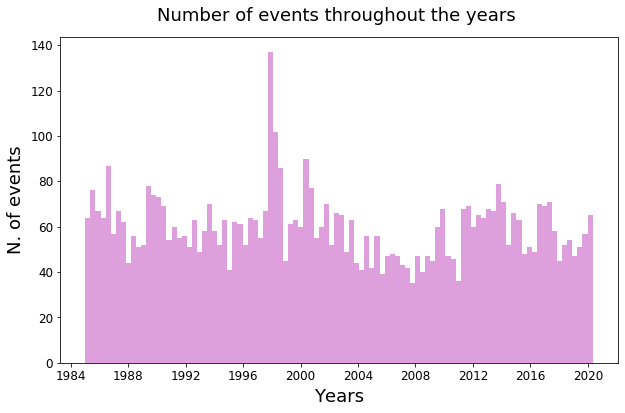

In [9]:
df["Time"] = df["Time"].astype("datetime64")
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(df['Time'], bins=100, color='plum')
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel("Years",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("N. of events",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
plt.title('Number of events throughout the years ',fontsize=18,pad=15.5)
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\Nevents_time_correlationmetricsdeclustering.png",dpi=600)
plt.show()

In [10]:
number_time

,0,1,2,3,4,5,6,7,8,9,...,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875
0,0.000000e+00,1.581706e+05,2.482224e+05,3.244586e+05,9.216840e+05,9.586911e+05,1.060882e+06,1.204205e+06,1.216247e+06,1.468778e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.216840e+05,9.586911e+05,1.060882e+06,1.204205e+06,1.216247e+06,1.468778e+06,2.250063e+06,2.496583e+06,2.599938e+06,2.737730e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.250063e+06,2.496583e+06,2.599938e+06,2.737730e+06,3.034740e+06,3.184810e+06,3.319243e+06,3.379743e+06,3.589642e+06,3.602773e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.599938e+06,2.737730e+06,3.034740e+06,3.184810e+06,3.319243e+06,3.379743e+06,3.589642e+06,3.602773e+06,3.739852e+06,3.781620e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.589642e+06,3.602773e+06,3.739852e+06,3.781620e+06,3.853319e+06,3.926383e+06,4.064462e+06,4.216724e+06,4.282365e+06,4.353942e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,7.915386e+08,7.916087e+08,7.919662e+08,7.920460e+08,7.924936e+08,7.926309e+08,7.927310e+08,7.929137e+08,7.929569e+08,7.931855e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,7.924936e+08,7.926309e+08,7.927310e+08,7.929137e+08,7.929569e+08,7.931855e+08,7.932486e+08,7.935332e+08,7.938609e+08,7.940003e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,7.931855e+08,7.932486e+08,7.935332e+08,7.938609e+08,7.940003e+08,7.941143e+08,7.942606e+08,7.947485e+08,7.952052e+08,7.954630e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,7.941143e+08,7.942606e+08,7.947485e+08,7.952052e+08,7.954630e+08,7.961635e+08,7.961779e+08,7.963204e+08,7.963406e+08,7.964995e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
DATA=a
DATA['Time'] = pd.to_datetime(DATA['Time'])
a_numpy=DATA.to_numpy()
slice_numpy=a_numpy[:,4].astype(np.datetime64)
list_array=[]
#whereis=np.where(slice_numpy=='Time') #search where is the cell called 'Time'
'''
n=0
for i in slice_numpy:
    n+=1
    if n>1:
        list_array.append(i)
list_array''' #to transform numpy array to list
m=0
lis_diff=[]
lis=[]
for i in slice_numpy:
    m+=1
    if m>0 and m < len(slice_numpy):  #the second condition is written to avoid the error due to exceedance of array lenght  
        diff=((slice_numpy[m]-slice_numpy[m-1])/1000000).astype(np.int32) #convert in int
        lis_diff.append(diff)            
        if np.floor_divide(diff,60*24)>0:       
            hours=np.floor_divide(diff,60*60)
            if hours<10: #to put zero
                hours='0'+str(hours)
            hou=np.mod(diff,60*60*24)
            minu=np.mod(hou,60*60)
            minutes=np.floor_divide(minu,60)
            if minutes<10:
                minutes='0'+str(minutes)
            seconds=np.mod(minu,60)
            if seconds<10: 
                seconds='0'+str(seconds)
        else: # np.floor_divide(diff,60)>0:
            minu=np.mod(diff,60*60)
            minutes=np.floor_divide(minu,60)
            if minutes<10:
                minutes='0'+str(minutes)
            seconds=np.mod(minu,60)
            if seconds<10:
                seconds='0'+str(seconds)
        real_time=f'{hours}:{minutes}.{seconds}' #look the previous caveat 
        lis.append(real_time) 
lis_series=pd.Series(lis)
print(lis_diff)

[158170, 90051, 76236, 597225, 37007, 102191, 143322, 12041, 252531, 781284, 246520, 103355, 137792, 297009, 150070, 134433, 60499, 209899, 13131, 137079, 41767, 71699, 73063, 138079, 152261, 65641, 71577, 94483, 227892, 187169, 106340, 79764, 101389, 463235, 493282, 242440, 44567, 107045, 443585, 170254, 210003, 126501, 71746, 34104, 51320, 31658, 54531, 535006, 58903, 179980, 138947, 506910, 279370, 71606, 273455, 96334, 252740, 129641, 140821, 98452, 178688, 152767, 9748, 380608, 78181, 24978, 187792, 29187, 83656, 207340, 265862, 63046, 72493, 386955, 97071, 324038, 111383, 19646, 8006, 330810, 201404, 638229, 344497, 10365, 86943, 164344, 419495, 25272, 227002, 60883, 70654, 57606, 494094, 130116, 78902, 50352, 3160, 166370, 9945, 63982, 199927, 31546, 34733, 266591, 108450, 176406, 111619, 383396, 129523, 85186, 12412, 267617, 34538, 42915, 58756, 134716, 428990, 47155, 48746, 399850, 310342, 63252, 55564, 61783, 9195, 183372, 18084, 247445, 12056, 163669, 36003, 204059, 78339, 1

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


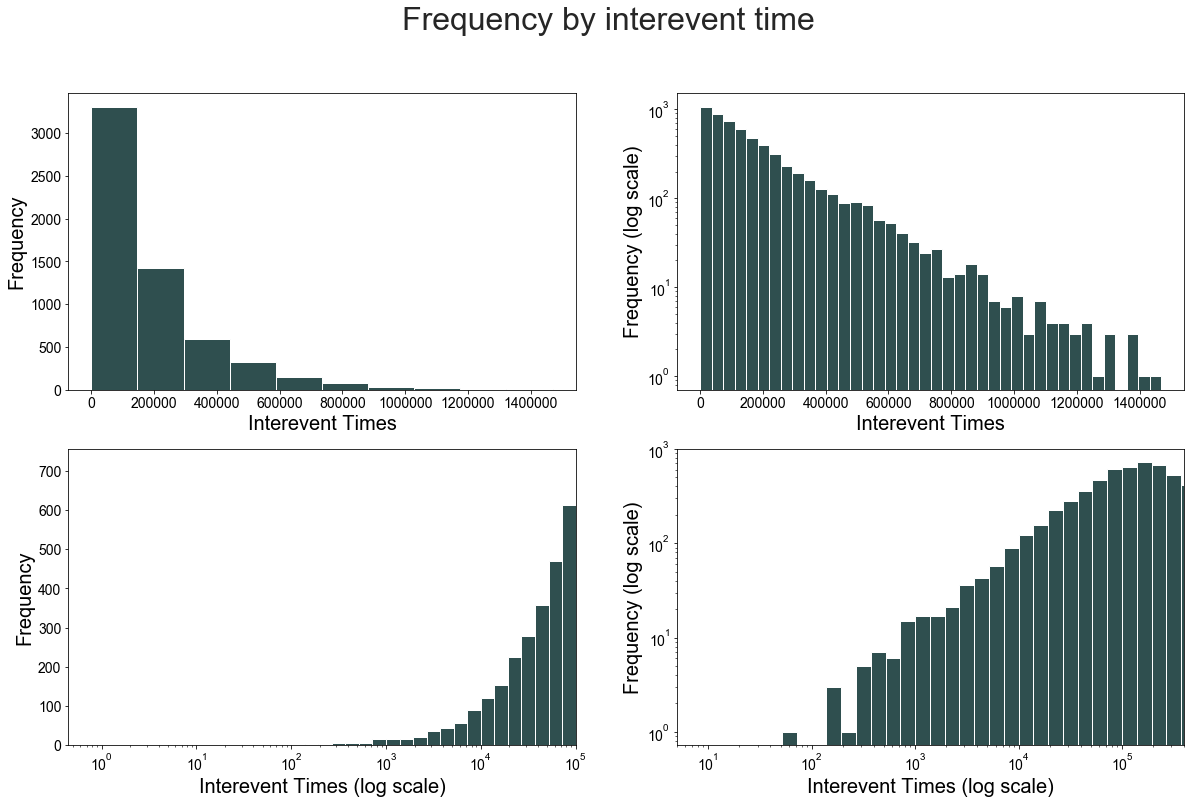

In [14]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('Frequency by interevent time',fontsize=32)
# Draw a nested boxplot 
bins = np.logspace(0,7,num=50)    
axes[0][0].hist(lis_diff,color='darkslategray')  
axes[1][0].hist(lis_diff,bins=bins,color='darkslategray')
axes[0][1].hist(lis_diff,bins=40,color='darkslategray')
axes[1][1].hist(lis_diff,bins=bins,color='darkslategray')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Interevent Times",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency",fontsize=20) #set font and title of y label
            ax.tick_params(labelsize=14) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Interevent Times (log scale)",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency",fontsize=20) #set font and title of y label
            ax.set_xscale('log')
            ax.tick_params(labelsize=14)
            ax.set_xlim([0, 100000])
        elif i == 0 and j==1:
            title = ax.set_xlabel("Interevent Times",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=20) #set font and title of y label
            ax.set_yscale('log')
            ax.tick_params(labelsize=14)

        elif i==1 and j == 1:
            title = ax.set_xlabel("Interevent Times (log scale)",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=20) #set font and title of y label
            ax.tick_params(labelsize=14)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlim([5, 400000])
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-frequency_logscale_united_correlationmetrics.png",dpi=600)

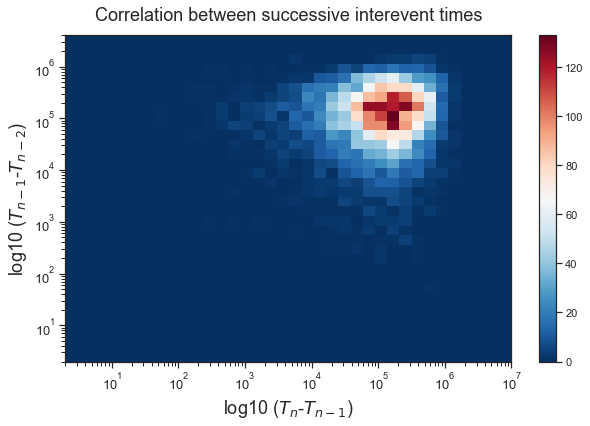

In [15]:
a=lis_diff
m=0
lis_diff2=[]
for i in a:
    m+=1
    if m>=0 and m < len(a):
        diff2=[a[m],a[m-1]]
        lis_diff2.append(diff2)
final1=[]
final2=[]
for i in lis_diff2:
    j=i[0]
    k=i[1]    
    final1.append(j)
    final2.append(k)
bins = np.logspace(0,9,num=50) 
plt.subplots(figsize=(10,6))
plt.hist2d(final1,final2,bins,cmap=plt.cm.RdBu_r)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation between successive interevent times ',fontsize=18,pad=15.0) 
plt.xlim([2, 10000000])
plt.ylim([2, 4000000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=18,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=13)
plt.colorbar()
plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_hist2d_correlation_metrics.png",dpi=600)

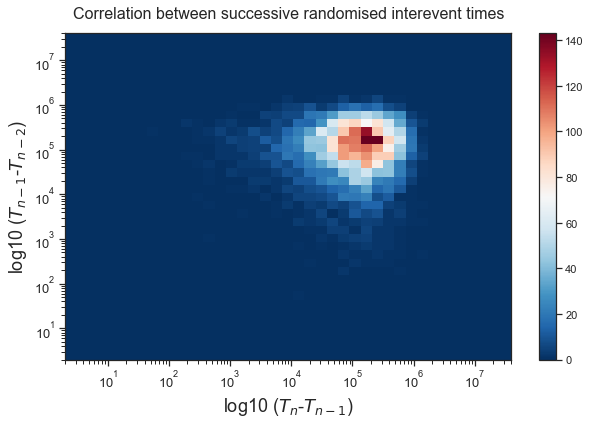

In [16]:
import random
m=0
random.shuffle(lis_diff)
lis_diff2_randomised=[]
for i in lis_diff:
    m+=1
    if m>=0 and m < len(lis_diff):
        diff2=[lis_diff[m],lis_diff[m-1]]
        lis_diff2_randomised.append(diff2)
final1_rand=[]
final2_rand=[]
for i in lis_diff2_randomised:
    j=i[0]
    k=i[1]    
    final1_rand.append(j)
    final2_rand.append(k)
bins = np.logspace(0,9,num=50) 
plt.subplots(figsize=(10,6))
plt.hist2d(final1_rand,final2_rand,bins,cmap=plt.cm.RdBu_r)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation between successive randomised interevent times',fontsize=16,pad=15.0) 
plt.xlim([2, 40000000])
plt.ylim([2, 40000000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=18,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=13)
plt.colorbar()
plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_randomised_hist2d_correlation_metrics.png",dpi=600)